In [22]:
%load_ext autoreload
%autoreload 2
from avseg.segment import segment, ModelType, FineTuningFrom
from avseg.const import CMAP
import torch
import cv2
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


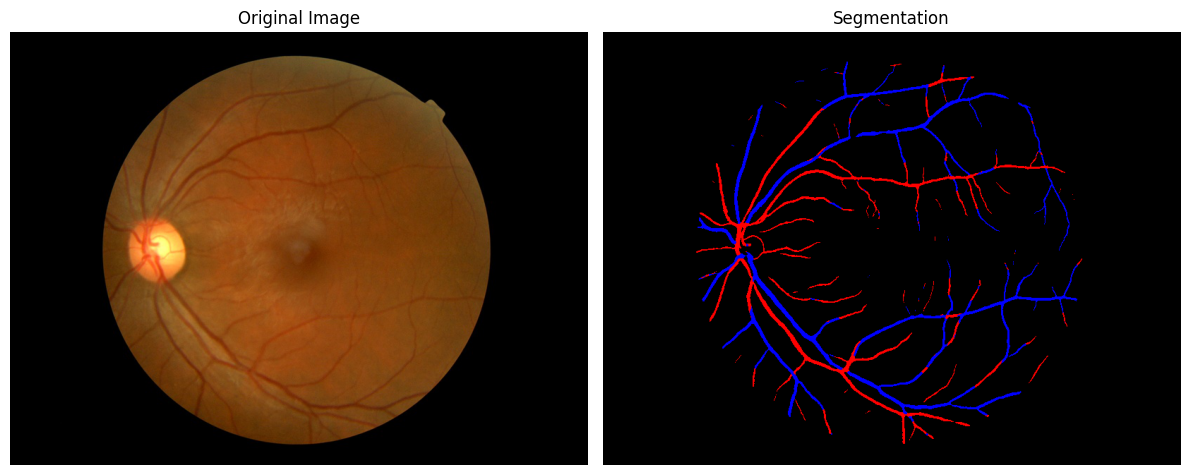

In [ ]:
# Load a test image (replace with your own image path)
img = cv2.imread("test_image.png")[:, :, ::-1]  # BGR to RGB

# Infer:
segmentation = segment(
    img,
    model_type=ModelType.MULTILABEL,
    finetuned_from=FineTuningFrom.FUNDUS,
    image_resolution=1024,
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img)  # Show the original image
ax[0].set_title("Original Image")
ax[0].axis("off")
ax[1].set_title("Segmentation")
ax[1].axis("off")
ax[1].imshow(segmentation.argmax(0), cmap=CMAP)  # Show the segmentation of the image
plt.tight_layout()
plt.show()